Predicting the outcome of the drugs that might be accurate for a patient

Data Preprocessing

In [30]:
#1. Preprocess data by applying all concepts covered including
#  -dealing with empty values
#  -Handling categorical and non-numeric values(use any type of encoding)
#  -Generate few plots; bar and pie plots using any features but should include both single and multivariate plots.

#2. drop one feature if two features have a correlation greater than 0.9


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
data=pd.read_csv("C:/Users/DEE/Desktop/INTERNSHIP/Drug_data.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [33]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [34]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [36]:
label = LabelEncoder()

# data[cat_cols] = label.fit_transform(data[cat_cols])
# data

data['Sex'] = label.fit_transform(data['Sex'])
data['BP'] = label.fit_transform(data['BP'])
data['Cholesterol'] = label.fit_transform(data['Cholesterol'])
data['Drug'] = label.fit_transform(data['Drug'])




In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


In [38]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


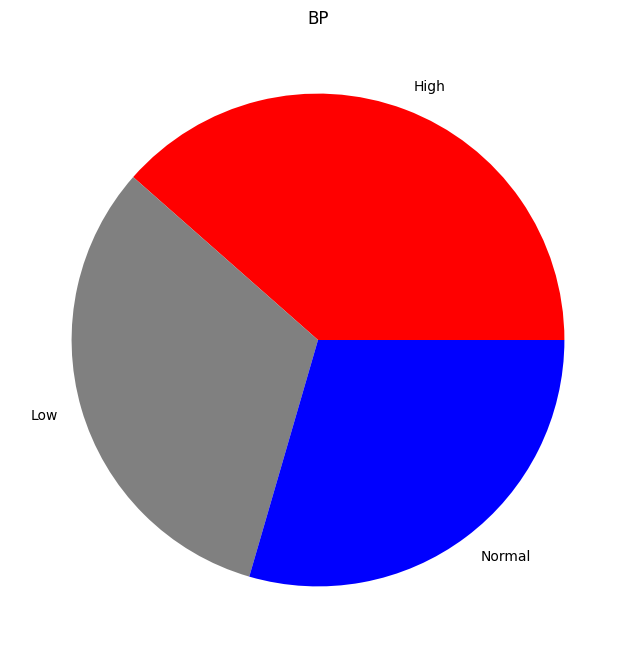

In [39]:
labels=['High','Low','Normal']
colors=['red','gray','blue']

plt.figure(figsize=(8,8))
plt.pie(data['BP'].value_counts(),labels=labels,colors=colors)
plt.title('BP')
plt.show()

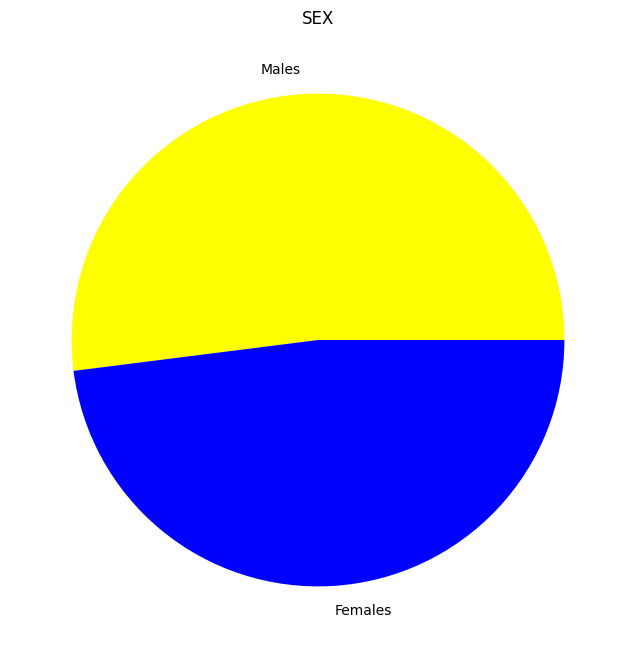

In [40]:
labels=['Males','Females']
colors=['yellow','blue']

plt.figure(figsize=(8,8))
plt.pie(data['Sex'].value_counts(),labels=labels,colors=colors)
plt.title('SEX')
plt.show()

Text(0.5, 1.0, 'A bar plot of Age')

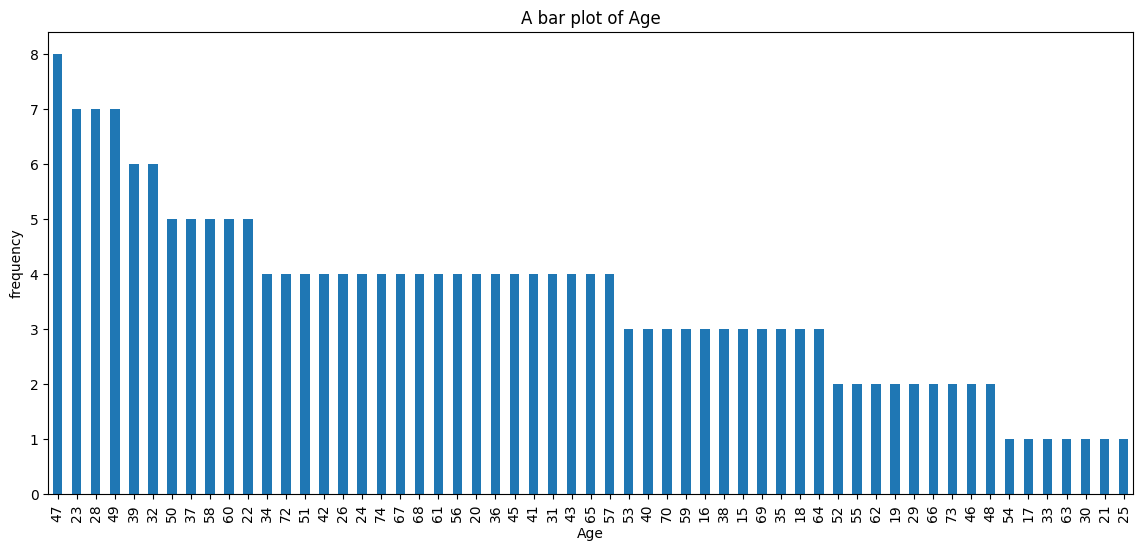

In [41]:
bar_1 = data['Age'].value_counts().plot(kind='bar', figsize=(14,6))
bar_1.set_ylabel('frequency')
bar_1.set_xlabel('Age')
bar_1.set_title('A bar plot of Age')

Text(0.5, 1.0, 'A bar plot of Drug')

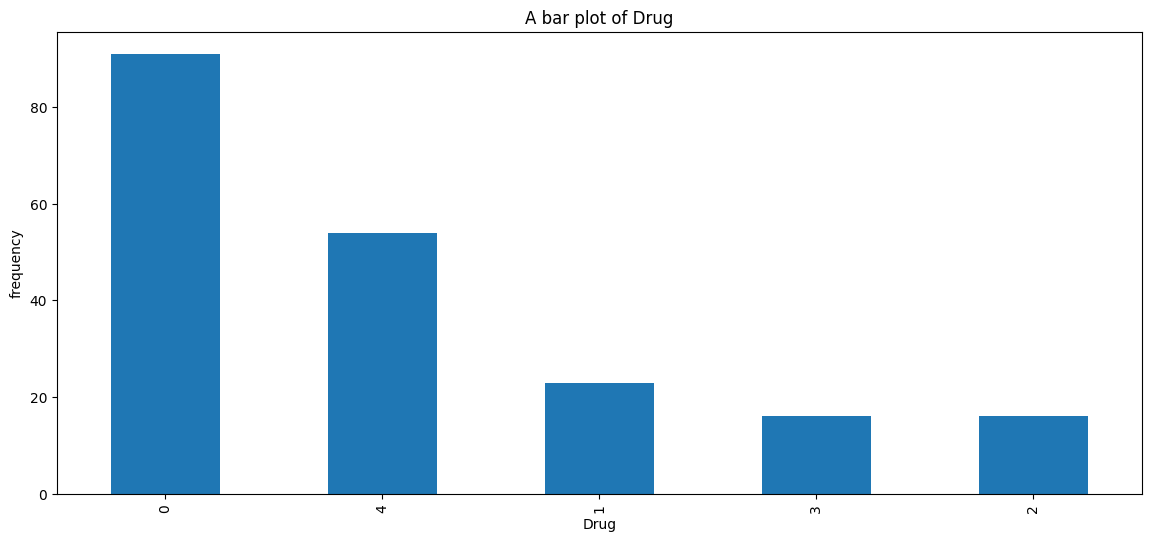

In [42]:
bar_2 = data['Drug'].value_counts().plot(kind='bar', figsize=(14,6))
bar_2.set_ylabel('frequency')
bar_2.set_xlabel('Drug')
bar_2.set_title('A bar plot of Drug')

In [43]:
corr=data.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


Model building

In [44]:
#Split data into target feature and independent features(check meta-data)
y = data['Drug']
X = data[["BP", "Age", "Sex",'Cholesterol','Na_to_K']]

In [45]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,
random_state = 69)

In [46]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
# perform Feature Scaling using codes below
from sklearn.preprocessing import StandardScaler  #import library
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

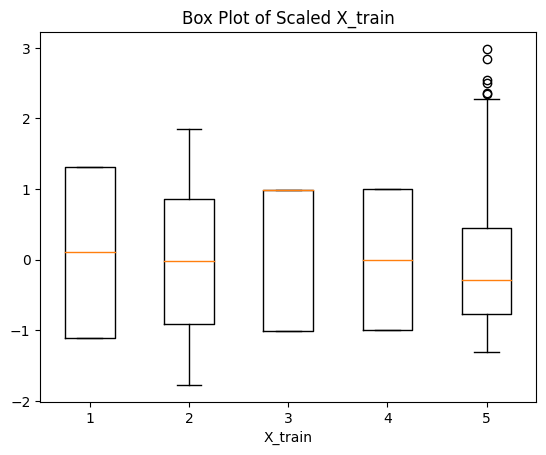

In [48]:
#visualise scaled data
plt.boxplot(X_train)
plt.xlabel('X_train')
plt.title('Box Plot of Scaled X_train')
plt.show()

Training a logistic regression classifier

In [49]:
# Fit a Logistic Regression model to the Training set
from sklearn.linear_model import LogisticRegression 
# fit training data to LogisticRegression()

log_regression = LogisticRegression()

log_regression.fit(X_train, y_train)


LogisticRegression()

In [51]:
# Make predictions on the Test set
y_pred_1 = log_regression.predict(X_test)
y_pred_1

array([1, 2, 0, 2, 4, 1, 0, 4, 1, 4, 2, 0, 4, 4, 0, 0, 0, 1, 0, 1, 4, 4,
       4, 0, 4, 0, 0, 4, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 3, 4, 1, 3, 2,
       0, 3, 4, 0, 4, 0, 4, 2, 0, 4, 4, 0, 0, 0, 0, 2])

In [52]:
#Training a Support vector machine classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train) 
# Make predictions on the Test set
y_pred_2 = classifier.predict(X_test)
y_pred_2

array([1, 2, 0, 0, 4, 1, 0, 4, 1, 4, 2, 0, 4, 4, 0, 0, 0, 0, 0, 1, 4, 4,
       4, 0, 4, 0, 0, 4, 1, 0, 0, 4, 4, 0, 1, 0, 0, 0, 0, 3, 4, 1, 3, 2,
       0, 0, 4, 0, 4, 0, 4, 4, 0, 4, 3, 0, 0, 0, 0, 2])

In [53]:
#Training a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# Make predictions on the Test set.
y_pred_3 = rfc.predict(X_test[[5]])
y_pred_3


array([1])